# Visualizações - a partir dos dados

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('resumo_precipitação.csv')
df = df.fillna('')
coluna_1 = ['Ano','Mês','Precipitação (mm) - Média','Precipitação (mm) - Mediana','Precipitação (mm) - Máximo','Precipitação (mm) - Mínimo']
#coluna_1
coluna_2 = ['Precipitação (mm) - Média','Precipitação (mm) - Mediana','Precipitação (mm) - Máximo','Precipitação (mm) - Mínimo']
#coluna_2
df.drop(0 , inplace=True)
df.columns = coluna_1
df[['Ano','Mês']] = df[['Ano','Mês']].astype('int')
df = df.reset_index()
mes = []
for i in range(len(df)):
    if df['Mês'][i] <10:
        mes.append('0'+df['Mês'][i].astype('str'))
    else:
        mes.append(''+df['Mês'][i].astype('str'))
df['MêsSTR'] = mes
for i in coluna_2:
    df[f'{i}'] = df[f'{i}'].astype('float')
df['Ano-Mês'] =  df['Ano'].astype('str') + '-' + df['MêsSTR'].astype('str')
df

,index,Ano,Mês,Precipitação (mm) - Média,Precipitação (mm) - Mediana,Precipitação (mm) - Máximo,Precipitação (mm) - Mínimo,MêsSTR,Ano-Mês
0,1,2000,6,16.87,2.6,48.0,0.0,06,2000-06
1,2,2000,7,39.13,40.2,77.0,0.2,07,2000-07
2,3,2000,8,89.20,89.2,125.8,52.6,08,2000-08
3,4,2000,9,191.80,191.8,191.8,191.8,09,2000-09
4,5,2000,10,124.00,125.8,189.2,57.0,10,2000-10
...,...,...,...,...,...,...,...,...,...
251,252,2021,8,37.10,20.0,309.0,0.0,08,2021-08
252,253,2021,9,62.18,29.8,279.0,0.0,09,2021-09
253,254,2021,10,160.58,153.3,430.4,0.0,10,2021-10
254,255,2021,11,163.22,153.2,518.6,0.0,11,2021-11


In [49]:
data = df.copy()
data = data[data['Ano']>=2010]
data

,index,Ano,Mês,Precipitação (mm) - Média,Precipitação (mm) - Mediana,Precipitação (mm) - Máximo,Precipitação (mm) - Mínimo,MêsSTR,Ano-Mês
112,113,2010,1,164.78,154.8,564.2,0.0,01,2010-01
113,114,2010,2,115.96,99.2,485.0,0.0,02,2010-02
114,115,2010,3,157.50,152.8,630.8,0.0,03,2010-03
115,116,2010,4,135.45,104.6,573.8,0.0,04,2010-04
116,117,2010,5,75.79,42.0,697.8,0.0,05,2010-05
...,...,...,...,...,...,...,...,...,...
251,252,2021,8,37.10,20.0,309.0,0.0,08,2021-08
252,253,2021,9,62.18,29.8,279.0,0.0,09,2021-09
253,254,2021,10,160.58,153.3,430.4,0.0,10,2021-10
254,255,2021,11,163.22,153.2,518.6,0.0,11,2021-11


In [57]:
data_ano = data.copy()
data_ano = data_ano.groupby('Ano').agg({'Precipitação (mm) - Média':'mean'})
data_ano = data_ano.reset_index()

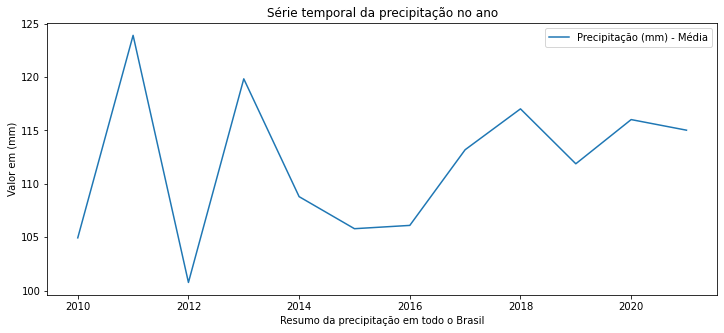

In [58]:
plt.figure(figsize = (12, 5)) 
sns.lineplot(x = 'Ano', 
             y = 'Precipitação (mm) - Média', 
             data = data_ano, 
             label = f'Precipitação (mm) - Média') 
plt.xlabel('Resumo da precipitação em todo o Brasil') 
plt.ylabel('Valor em (mm)')
plt.title('Série temporal da precipitação no ano')
plt.show()

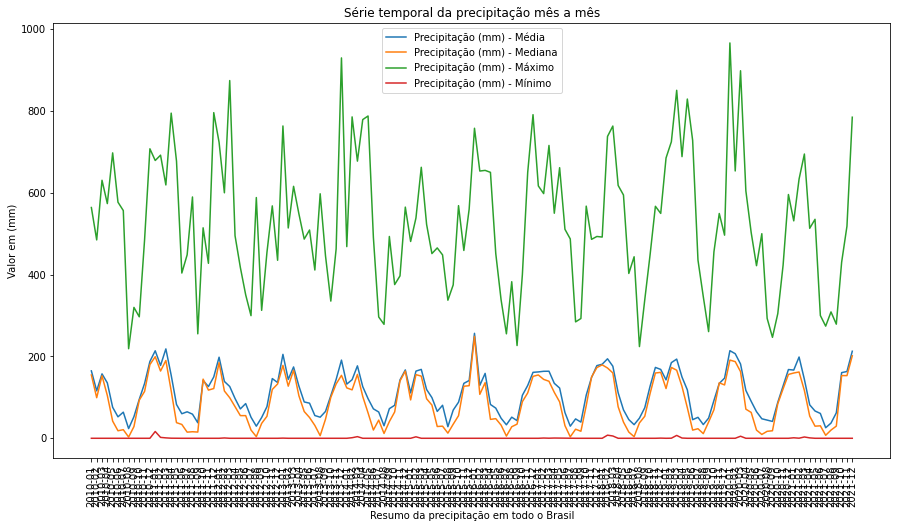

In [55]:
plt.figure(figsize = (15, 8)) 
for i in coluna_2:
    sns.lineplot(x = 'Ano-Mês', 
                 y = f'{i}', 
                 data = data, 
                 label = f'{i}') 
plt.xlabel('Resumo da precipitação em todo o Brasil') 
plt.ylabel('Valor em (mm)')
plt.title('Série temporal da precipitação mês a mês')
plt.xticks(rotation=90)
plt.show()